In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
import matplotlib.pyplot as plt
import quandl, math, datetime
from matplotlib import style
import pandas as pd
import numpy as np
import pickle

In [31]:
style.use("ggplot")
df = quandl.get("WIKI/GOOGL")
df = df.loc[:, "Adj. Open":"Adj. Volume"]
df["HL_PCT"] = (df["Adj. High"] - df["Adj. Close"]) / df["Adj. Close"] * 100
df["PCT_change"] = (df["Adj. Close"] - df["Adj. Open"]) / df["Adj. Open"] * 100

df = df.loc[:, "Adj. Close":"PCT_change"]
forecast_col = "Adj. Close"
df.fillna(-99999, inplace=True) # fill all missing values with `-99999` to make them outliers since we don't want to get rid of them.
forcast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forcast_out)
df

,Adj. Close,Adj. Volume,HL_PCT,PCT_change,label
Date,,,,,
2004-08-19,50.322842,44659000.0,3.712563,0.324968,69.078238
2004-08-20,54.322689,22834300.0,0.710922,7.227007,67.839414
2004-08-23,54.869377,18256100.0,3.729433,-1.227880,68.912727
2004-08-24,52.597363,15247300.0,6.417469,-5.726357,70.668146
2004-08-25,53.164113,9188600.0,1.886792,1.183658,71.219849
...,...,...,...,...,...
2018-03-21,1094.000000,1990515.0,1.343693,0.130884,NaN
2018-03-22,1053.150000,3418154.0,2.921711,-2.487014,NaN
2018-03-23,1026.550000,2413517.0,3.918952,-2.360729,NaN


In [32]:
X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X_lately =  X[-forcast_out:]
X = X[:-forcast_out]
df.dropna(inplace=True)
y = np.array(df['label'])

len(X), len(y) # They must be of same length

(3389, 3389)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Classifier = LinearRegression(n_jobs=-1) # n_jobs: refers to the number of training threads to use. (-1) stands for as nany as my computer can use.
# Classifier.fit(X_train, y_train)
# # Let's save our classifier in a .pickle file, so that we don't have to train our model each time we want to make predictions.
# with open('linearreg.pickle', 'wb') as file:
#     pickle.dump(Classifier, file)
# I commented the obove code, because I have ran it once and my .pickle file now contains my classifier
pickle_in = open('linearreg.pickle', 'rb')
Classifier = pickle.load(pickle_in) # Classifier is now the one gotten from our .pickle file
Accuracy = int((Classifier.score(X_test, y_test) * 100))
Accuracy = str(Accuracy) + "%"
print("This model is ", Accuracy, "Accurate")

This model is  97% Accurate


In [35]:
forecast_set = Classifier.predict(X_lately)
df['Forecast'] = np.nan
new_df = pd.DataFrame()
new_df['forecast_set'] = forecast_set
new_df['actual_set'] = y[-35:]
new_df

,forecast_set,actual_set
0,1101.010098,1084.43
1,1072.561873,1055.41
2,1019.952472,1005.60
3,1060.202085,1043.43
4,1072.650688,1054.56
5,1072.883363,1054.14
6,1091.281512,1072.70
7,1110.641264,1091.36
8,1113.940510,1095.50
9,1121.895888,1103.59


- we can also use svm for this, Let's try it out!!!
 all we need to do is to change `LinearRegression()` to `svm.SVR()`

In [36]:
# SVM_classifier = svm.SVR()
# SVM_classifier.fit(X_train, y_train)
# Accuracy = int((SVM_classifier.score(X_test, y_test) * 100)) 
# Accuracy = str(Accuracy) + "%"
# print("This model is ", Accuracy, "Accurate")

In [37]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400 # number of seconds in a day
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for column in range(len(df.columns) -1)] + [i]
    x = [np.nan for column in range(len(df.columns) -1)] + [i]
df

,Adj. Close,Adj. Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,
2004-08-19 00:00:00,50.322842,44659000.0,3.712563,0.324968,69.078238,NaN
2004-08-20 00:00:00,54.322689,22834300.0,0.710922,7.227007,67.839414,NaN
2004-08-23 00:00:00,54.869377,18256100.0,3.729433,-1.227880,68.912727,NaN
2004-08-24 00:00:00,52.597363,15247300.0,6.417469,-5.726357,70.668146,NaN
2004-08-25 00:00:00,53.164113,9188600.0,1.886792,1.183658,71.219849,NaN
...,...,...,...,...,...,...
2018-03-08 02:00:00,NaN,NaN,NaN,NaN,NaN,1112.250314
2018-03-09 02:00:00,NaN,NaN,NaN,NaN,NaN,1069.854557
2018-03-10 02:00:00,NaN,NaN,NaN,NaN,NaN,1042.255188


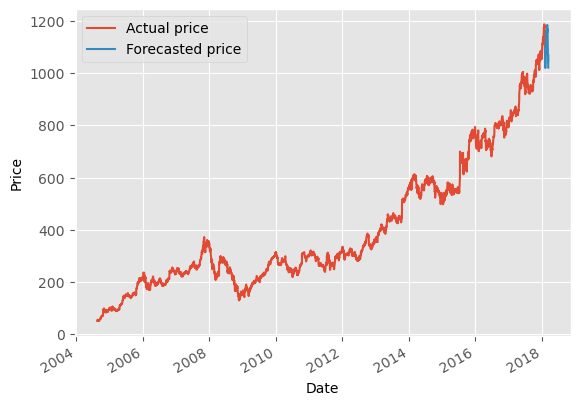

In [38]:
df['Adj. Close'].plot(label="Actual price")
df['Forecast'].plot(label="Forecasted price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()
# Checkout seaborn